In [0]:
!pip install nltk
!pip install twython

  Created wheel for twython: filename=twython-3.7.0-cp36-none-any.whl size=31996 sha256=e230c888dbb096dbf19f3478f51eff63ed986e53858b7a52a6279cc2ae7fc01c
  Stored in directory: /root/.cache/pip/wheels/c2/b0/a3/5c4b4b87b8c9e4d99f1494a0b471f0134a74e5fb33d426d009
Successfully built twython


In [0]:
import pandas as pd, numpy as np, itertools
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
DF=pd.DataFrame
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [0]:
%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['axes.titlesize'] = 22

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
!pwd

/content


In [0]:
mdf=pd.read_csv('Tweets_ALL.csv')
mdf['created_at']=pd.to_datetime(mdf['created_at'])
mdf['dtg']=mdf['created_at']

In [0]:
# This is now obcsolete 
# mdf=pd.read_csv('/Tweets_ALL_Format.csv')
# mdf=mdf.rename(columns={'Time':'dtg'})
# mdf=mdf.drop(['Unnamed: 10','Unnamed: 11'],axis=1)
# mdf['photo']=mdf['Media_Type'].isna()
# mdf=mdf.drop(['Media_Type'],axis=1)
# mdf['Hashtags']=mdf['Hashtags'].fillna('No-Hashtag')

# ### Apply Vader Polarization Score to each tweet and concat
# ### to main dataframe
# def get_sentiment(ser):
#   return pd.Series(sid.polarity_scores(ser.Tweet_Text))
# tdf=mdf.apply(get_sentiment,axis=1)
# mdf=pd.concat([mdf,tdf],axis=1)




In [0]:
mdf.describe()

,Unnamed: 0,retweet_count,favorite_count,id_str,neg,neu,pos,compound,id,year,month,day,day of week,hour,week
count,15984.000000,15984.000000,15984.000000,1.598400e+04,15984.000000,15984.000000,15984.000000,15984.000000,1.598400e+04,15984.00000,15984.000000,15984.000000,15984.000000,15984.000000,15984.000000
mean,7991.500000,17741.905280,59982.158721,1.093729e+18,0.079985,0.767603,0.152409,0.154239,1.093729e+18,2018.58471,6.759322,15.519645,3.943006,12.863739,26.893081
std,4614.327687,12452.036586,56515.621963,1.164454e+17,0.108326,0.163912,0.160143,0.566902,1.164454e+17,0.90841,3.650956,8.745134,1.936182,5.833297,15.884768
min,0.000000,0.000000,0.000000,8.154220e+17,0.000000,0.000000,0.000000,-0.986400,8.154220e+17,2017.00000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,3995.750000,10221.250000,0.000000,1.014260e+18,0.000000,0.665000,0.000000,-0.296000,1.014260e+18,2018.00000,3.000000,8.000000,2.000000,8.000000,11.000000
50%,7991.500000,15716.500000,61090.500000,1.129850e+18,0.000000,0.770500,0.116000,0.128000,1.129850e+18,2019.00000,7.000000,15.000000,4.000000,12.000000,29.000000
75%,11987.250000,22435.000000,91799.000000,1.190760e+18,0.139000,0.882000,0.240000,0.669600,1.190760e+18,2019.00000,10.000000,23.000000,6.000000,18.000000,41.000000
max,15983.000000,369530.000000,879647.000000,1.236140e+18,1.000000,1.000000,0.885000,0.989900,1.236140e+18,2020.00000,12.000000,31.000000,7.000000,23.000000,53.000000


In [0]:
### Add Time period columns
mdf['pmonth']=mdf['dtg'].dt.to_period('M')
mdf['pyear']=mdf['dtg'].dt.to_period('Y')
mdf['phour']=mdf['dtg'].dt.to_period('H')
mdf['hour']=mdf['dtg'].dt.hour

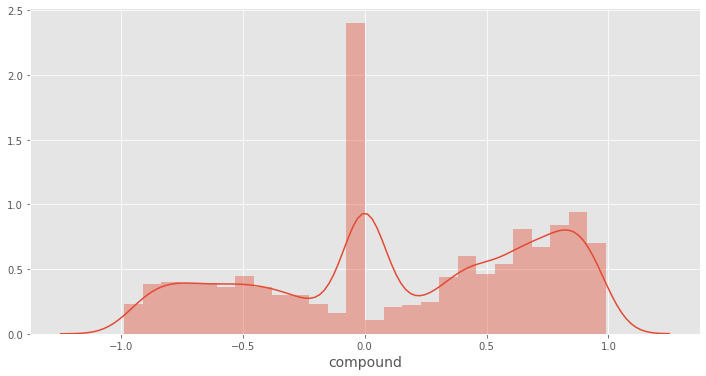

In [0]:
sns.distplot(mdf['compound'])

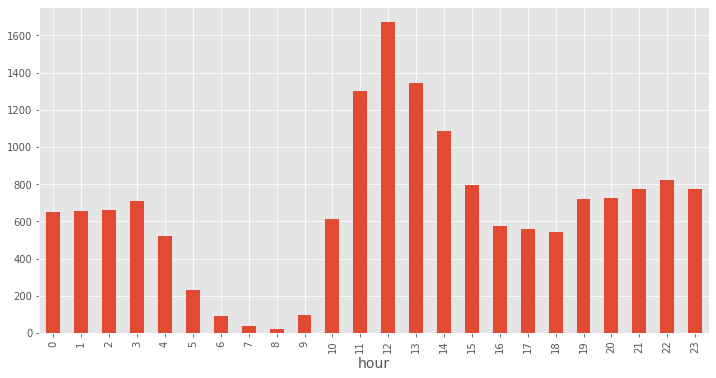

In [0]:
mdf.groupby('hour')['dtg'].count().plot(kind='bar')

WordClouds

In [0]:
mdf.columns

Index(['Unnamed: 0', 'created_date', 'source', 'text', 'created_at',
       'retweet_count', 'favorite_count', 'is_retweet', 'id_str', 'sentiment',
       'neg', 'neu', 'pos', 'compound', 'id', 'human_date', 'month/day',
       'year', 'month', 'year_month', 'day', 'day of week', 'hour', 'week',
       'year_week', 'text encoded', 'dtg'],
      dtype='object')

In [0]:
!pip install wordcloud

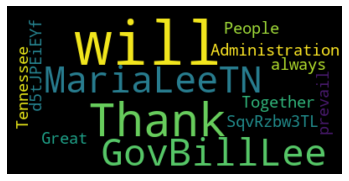

In [0]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = mdf.text[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

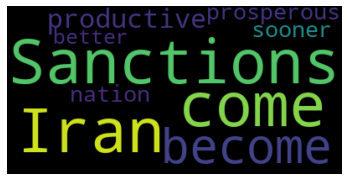

In [0]:
# Start with one review:
text = mdf.text[7370]
#text = " ".join(review for review in mdf.Tweet_Text)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "CO", "amp", "one","Im","said"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Start with one review:
text = mdf.text[2000]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["https", "CO", "amp", "one","Im","said"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

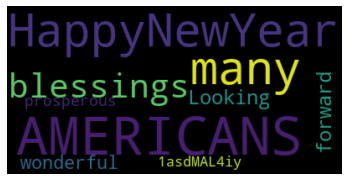

In [0]:
# Start with one review:
text = mdf.text[15983]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["https", "CO", "amp", "one","Im","said","RT","Democrat"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

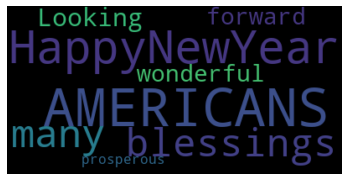

In [0]:
# Start with one review:
text = mdf.text[15983]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["1asdMAL4iy"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

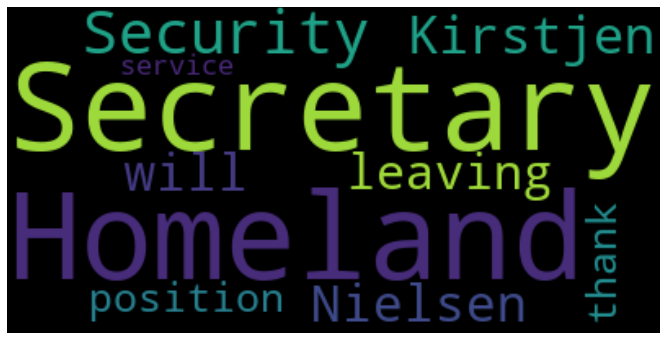

In [0]:
# Start with one review:
text = mdf.text[8786]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["https", "CO", "amp", "one","Im","said","RT","Democrat"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

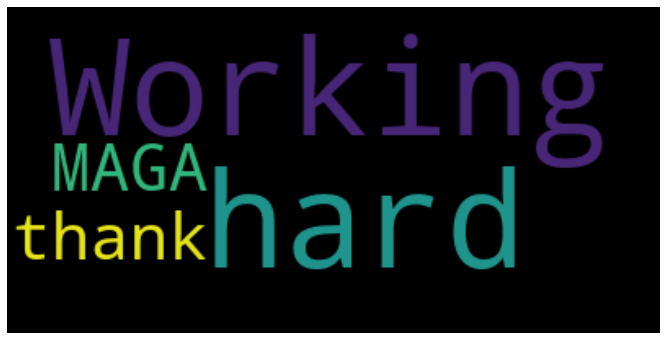

In [0]:
# Start with one review:
text = mdf.text[8888]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["00hoL0to0u"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

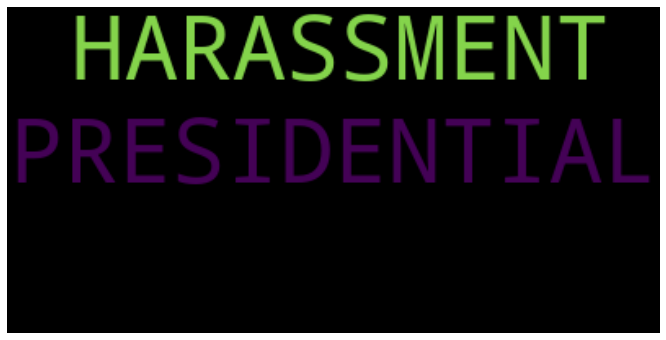

In [0]:
# Start with one review:
text = mdf.text[1935]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["00hoL0to0u"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

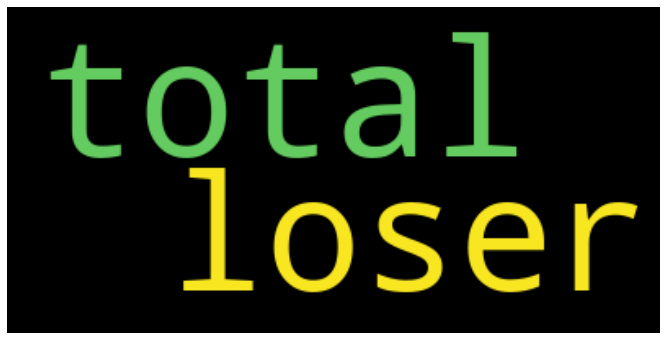

In [0]:
# Start with one review:
text = mdf.text[8983]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["vm3Vv2f9jf"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

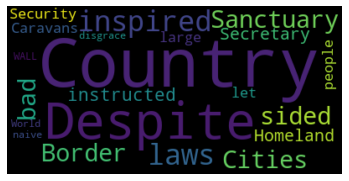

In [0]:
# Start with one review:
text = mdf.text[12632]
#text = " ".join(review for review in mdf.text)
# Create stopword list:
stopwords.update(["vm3Vv2f9jf"])
# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Hash Tag Analysis

In [0]:
### Hash Tag counts overall
ht_arr=mdf['Hashtags'].str.split(';').to_list()
ht_arr=pd.Series(list(itertools.chain.from_iterable(ht_arr)))

rt_df = DF(columns=['hashtag','N','rt_count_mean','rt_count_sigma'])
for ht in ht_arr.unique():
  N = len(mdf[mdf['Hashtags'].str.contains(ht)])
  mean = mdf[mdf['Hashtags'].str.contains(ht)]['Retweets'].mean()
  sigma = mdf[mdf['Hashtags'].str.contains(ht)]['Retweets'].std()
  rt_df=rt_df.append(
      dict(hashtag=ht,rt_count_mean=mean,rt_count_sigma=sigma,N=N),
      ignore_index=True
  )
  

In [0]:
rt_df.sample(5)

In [0]:
ht_arr_top10 = ht_arr[ht_arr!='No-Hashtag'].value_counts().head(15)
ht_arr_top10.plot(kind='bar',rot=60, title='Top 10 Hashtags')

## Other Analysis

# New Section

In [0]:

tweets=mdf.rename(columns={'Tweet_Text':'tweets','twt_favourites_IS_THIS_LIKE_QUESTION_MARK': 'favourites'})
tweets.drop(['Tweet_Url'], axis=1, inplace=True)
tweets.head()

In [0]:
data=tweets
pos = pd.Series(data=data['pos'].values, index=data['dtg']) #positive tweets
neu = pd.Series(data=data['neu'].values, index=data['dtg']) #neutral tweets
neg = pd.Series(data=data['neg'].values, index=data['dtg'])#negative tweets
Retweets = pd.Series(data=data['Retweets'].values, index=data['dtg'])#retweets


In [0]:
Retweets.plot(figsize=(16,4), color='r');

In [0]:
pos.plot(figsize=(16,4), label="pos", legend=True)
neu.plot(figsize=(16,4), label="neu", legend=True)
neg.plot(figsize=(16,4), label="neg", legend=True);

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

def analize_sentiment(tweet):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweet))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
#Note: if you rerun this click below other analysis "on tweets=mdf.rename(columns={'Tweet_Text':'tweets','twt_favourites_IS_THIS_LIKE_QUESTION_MARK': 'favourites'})
#tweets.head()"
# other wise you will not be able to replace it change to int
# the reason it turn to Int I create the graph before I created this analysis

# trying different way

from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets['polarity'] = tweets['tweets'].apply(pol)
tweets['subjectivity'] = tweets['tweets'].apply(sub)
tweets

In [0]:
#Note if you rerun this click on tweets=mdf.rename(columns={'Tweet_Text':'tweets','twt_favourites_IS_THIS_LIKE_QUESTION_MARK': 'favourites'})
#tweets.head() other wise you will not be able to replacete this it will change to int

# We create a column with the result of the analysis:
tweets['SentAly'] = np.array([ analize_sentiment(tweets) 
  for tweet in tweets['tweets']])

# We display the updated dataframe with the new column:
display(tweets.head(10))

In [0]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(tweets.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('compound')
plt.title('Histogram of polarity')
plt.show();

In [0]:
plt.figure(figsize=(20,6))
sns.lineplot(x='polarity', y='Retweets', data=tweets)
plt.show();

In [0]:
plt.figure(figsize=(10,6))
sns.lineplot(x='SentAly', y='compound', data=tweets)
plt.show();

In [0]:
tweets.tail(10)

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
#mdf1=pd.read_csv('Tweets_ALL_Format.csv',sep=','),
mdf1=pd.read_csv('Tweets_ALL_Format.csv')
mdf1=mdf1.rename(columns={'text':'tweets'})
mdf1.drop(['created_at','id_str','id','retweet_count','favorite_count','sentiment'], axis=1, inplace=True)

In [0]:
mdf1

In [0]:
# Start with one review:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
tweets = mdf1.tweets[0]
stopwords = set(STOPWORDS)
# Create and generate a word cloud image:
stopwords.update(["wPk7QWpK8Z", "co", "https","SqvRzbwTL"])
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Start with one review:
#text = mdf.Tweet_Text[1]7370
tweets = " ".join(review for review in mdf1.tweets)
# Create stopword list:

stopwords.update(["https", "CO", "amp", "one","Im","said","RT"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
# Start with one review:
tweets = mdf1.tweets[7370]
#text = " ".join(review for review in mdf.Tweet_Text)
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["https", "CO", "amp", "one","Im","said"])


# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(tweets)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
mdf1.text

In [0]:
data1=mdf1

In [0]:
data=mdf1
pos = pd.Series(data=data['pos'].values, index=data['day']) #positive tweets
neu = pd.Series(data=data['neu'].values, index=data['day']) #neutral tweets
neg = pd.Series(data=data['neg'].values, index=data['day'])#negative tweets
#Retweets = pd.Series(data1=data['Retweets'].values, index=data['dtg'])#retweets

In [0]:
data=mdf1
pos = pd.Series(data=data['pos'].values, index=data['month/day']) #positive tweets
neu = pd.Series(data=data['neu'].values, index=data['month/day']) #neutral tweets
neg = pd.Series(data=data['neg'].values, index=data['month/day'])#negative tweets
#Retweets = pd.Series(data1=data['Retweets'].values, index=data['dtg'])#retweets
pos.plot(figsize=(16,4), label="pos", legend=True)
neu.plot(figsize=(16,4), label="neu", legend=True)
neg.plot(figsize=(16,4), label="neg", legend=True);

In [0]:
def get_sentiment(ser):
  return pd.Series(sid.polarity_scores(ser.tweets))
data=mdf1.apply(get_sentiment,axis=1)
data=pd.concat([mdf1,data],axis=1)

In [0]:
mdf1.describe()

In [0]:
### Apply Vader Polarization Score to each tweet and concat
### to main dataframe
def get_sentiment(ser):
  return pd.Series(sid.polarity_scores(ser.tweets))
mdf1=mdf1.apply(get_sentiment,axis=1)
mdf1=pd.concat([mdf1,mdf1],axis=1)

In [0]:
from textblob import TextBlob
import re

def clean_tweet(tweets):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweets).split())

def analize_sentiment(tweets):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(clean_tweet(tweets))
    if analysis.sentiment.polarity > 0:
        return 1
    elif analysis.sentiment.polarity == 0:
        return 0
    else:
        return -1

In [0]:
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

tweets['polarity'] = tweets['text'].apply(pol)
tweets['subjectivity'] = tweets['text'].apply(sub)
tweets.astypt(float)


In [0]:
# We create a column with the result of the analysis:
tweets['Polarity'] = np.array([ analize_sentiment(tweets) 
  for text in tweets['tweets']])

# We display the updated dataframe with the new column:
display(tweets.head(10))

In [0]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(text.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('polarity')
plt.ylabel('compound')
plt.title('Histogram of polarity')
plt.show();

**START OF MODELING SECTION**

In [0]:
!pip install arrow
!pip install agate
!pip install vaderSentiment
# -*- coding: utf-8 -*-
%matplotlib inline

import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET

from locale import atof
from dateutil import parser
from datetime import datetime

plt.style.use('seaborn-deep')
matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

     |████████████████████████████████| 102kB 2.8MB/s 
     |████████████████████████████████| 51kB 7.6MB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
  Created wheel for parsedatetime: filename=parsedatetime-2.5-cp36-none-any.whl size=42840 sha256=c821c75306fdbb5b90cfaf6a2e2fb4e2f068b899f6b1964d76cea23d3a462fc3
  Stored in directory: /root/.cache/pip/wheels/12/56/67/8421ce18d51e7e51b06224d9735cd3257c84d2eb929c734f89
Successfully built parsedatetime
     |████████████████████████████████| 133kB 3.4MB/s 


In [0]:
import os
tweets=pd.read_csv(os.path.join(os.getcwd(),'data','Trump_Plain.txt'),encoding='unicode_escape')


In [0]:
analyzer = SentimentIntensityAnalyzer()
def sentiment(row):
    return analyzer.polarity_scores(row.text)

In [0]:
tweets['sentiment']= tweets.apply(sentiment, axis=1)

In [0]:
def neg(row):
    return row.sentiment['neg']

def neu(row):
    return row.sentiment['neu']

def pos(row):
    return row.sentiment['pos']

def compound(row):
    return row.sentiment['compound']


In [0]:
tweets['neg']=tweets.apply(neg, axis=1)
tweets['neu']=tweets.apply(neu, axis=1)
tweets['pos']=tweets.apply(pos, axis=1)
tweets['compound']=tweets.apply(compound, axis=1)

In [0]:
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.text.fillna(tweets.text, inplace=True)

In [0]:
# Stub for helpers
# convert utc to est
def convertUTCtoFull(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('dddd, MMM D, YYYY h:mm A')

# convert to year
def convertUTCtoYear(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY')

# convert to month
def convertUTCtoMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('MM')

# convert to year-month
def convertUTCtoYearMonth(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM')

# convert to day
def convertUTCtoDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('D')

# convert to month/day
def convertUTCtoMonthDay(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('YYYY-MM-DD')

# convert to day of week
def convertUTCtoDayOfWeek(date):
    utc = arrow.get(date)
    return utc.to('US/Eastern').format('d')

# convert to time
def convertUTCtoHourOfDay(date):
    utc = arrow.get(date)
    return int(utc.to('US/Eastern').format('HH'))

# convert to week of year
def convertUTCtoWeekNumber(date):
    return int(date.strftime('%U'))

# convert to year + week of year
def convertUTCtoYearWeekNumber(date):
    utc = arrow.get(date)
    year = utc.to('US/Eastern').format('YYYY')
    weekno = int(date.strftime('%U'))
    return str(year) + '-' + str(weekno).zfill(2)

# Strip HTML
def stripHTML(html):
    tree = ET.fromstring(html)
    return ET.tostring(tree, encoding='utf8', method='text')

# Encode with closest thing to character
def encodeText(line):
    line = unicodedata.normalize('NFKD', line).encode('ascii','ignore')
    return line

In [0]:
tweets['created_date'] = pd.to_datetime(tweets['created_at'])
tweets['id'] = tweets['id_str']
tweets.text.fillna(tweets.text, inplace=True)

In [0]:
tweets['human_date'] = tweets['created_date'].apply(convertUTCtoFull)
tweets['month_day'] = tweets['created_date'].apply(convertUTCtoMonthDay)
tweets['year'] = tweets['created_date'].apply(convertUTCtoYear)
tweets['month'] = tweets['created_date'].apply(convertUTCtoMonth)
tweets['year_month'] = tweets['created_date'].apply(convertUTCtoYearMonth)
tweets['day'] = tweets['created_date'].apply(convertUTCtoDay)
tweets['day of week'] = tweets['created_date'].apply(convertUTCtoDayOfWeek)
tweets['hour'] = tweets['created_date'].apply(convertUTCtoHourOfDay)
tweets['week'] = tweets['created_date'].apply(convertUTCtoWeekNumber) 
tweets['year_week'] = tweets['created_date'].apply(convertUTCtoYearWeekNumber)
tweets['text encoded'] = tweets['text'].apply(encodeText)
tweets.set_index('created_date', inplace=True)


In [0]:
tweets.to_csv(os.path.join(os.getcwd(),'data', 'Tweets_ALL.csv'))

**POLICY COMPARISON *COSINE* MODEL**

In [0]:
import nltk
from nltk.corpus import gutenberg
from pprint import pprint
import numpy as np

In [0]:
#Extracting only original tweets
orig_df= tweets.loc[tweets.is_retweet==False]
len(orig_df)

13132

In [0]:
#Creating the corpus
import nltk
import re
import numpy as np
nltk.download('stopwords')
nltk.download('punkt')


stop_words = nltk.corpus.stopwords.words('english')
def normalize_document(doc):
    doc= re.sub(r'[^a-zA-Z0-9\s]', '', doc, re.I|re.A )
    doc= doc.lower()
    doc=doc.strip()
    tokens = nltk.word_tokenize(doc)
    filtered_tokens = [token for token in tokens if token not in stop_words]
    doc = ' '.join(filtered_tokens)
    return doc
normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(list(orig_df['text']))
len(norm_corpus)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


13132

In [0]:
#Creating the matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(ngram_range= (1,2), min_df=2)
tfidf_matrix = tf.fit_transform(norm_corpus)
tfidf_matrix


<13132x30678 sparse matrix of type '<class 'numpy.float64'>'
	with 265805 stored elements in Compressed Sparse Row format>

In [0]:
#Implementing the Distance Model 
from sklearn.metrics.pairwise import cosine_similarity
doc_sim = cosine_similarity(tfidf_matrix)
doc_sim_df = pd.DataFrame(doc_sim)

In [0]:
doc_sim_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,13092,13093,13094,13095,13096,13097,13098,13099,13100,13101,13102,13103,13104,13105,13106,13107,13108,13109,13110,13111,13112,13113,13114,13115,13116,13117,13118,13119,13120,13121,13122,13123,13124,13125,13126,13127,13128,13129,13130,13131
0,1.000000,0.059846,0.000000,0.0,0.0,0.358715,0.189661,0.0,0.007911,0.0,0.0,0.0,0.000000,0.130400,0.033069,0.130400,0.000000,0.000000,0.027633,0.046872,0.000000,0.130400,0.011247,0.032443,0.0,0.000000,0.00000,0.000000,0.000000,0.012981,0.011682,0.009986,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0000,0.009038,0.000000,0.0,0.0,0.000000,0.000000,0.015038,0.026037,0.0,0.0,0.019938,0.00000,0.0,0.00000,0.000000,0.0,0.015240,0.000000,0.000000,0.0,0.029025,0.000000,0.015663,0.010672,0.0,0.000000,0.000000,0.0,0.012778,0.000000,0.000000,0.0,0.000000,0.030580,0.000000,0.000000,0.062243,0.000000
1,0.059846,1.000000,0.075989,0.0,0.0,0.045831,0.056999,0.0,0.000000,0.0,0.0,0.0,0.000000,0.231401,0.000000,0.231401,0.023558,0.000000,0.031446,0.053339,0.000000,0.231401,0.000000,0.000000,0.0,0.043612,0.00000,0.000000,0.000000,0.039143,0.079744,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.050767,0.00000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.021124,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.027044,0.000000,0.000000,0.0,0.051506,0.000000,0.000000,0.044887,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.025845,0.000000,0.037534,0.000000
2,0.000000,0.075989,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.031039,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.041147,0.0,0.017679,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,1.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058363,0.000000,0.000000,0.000000,0.0,0.000000,0.07002,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.123629,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.000000,0.070200,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13127,0.030580,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.043018,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [0]:
#Indexing to date
tweet_list = orig_df['month_day'].values
tweet_list, tweet_list.shape

(array(['2020-03-06', '2020-03-06', '2020-03-06', ..., '2017-01-02',
        '2017-01-02', '2017-01-01'], dtype=object), (13132,))

In [0]:
#Picking a date to find comparative tweets 
#Picked 2 days before the final Senate vote to clear of impeachment 
tweet_date= '2018-04-18'

In [0]:
#Array list of comparative tweets
tweet_idx = np.where(tweet_list == tweet_date)
tweet_idx

(array([10258, 10259, 10260, 10261, 10262, 10263, 10264, 10265]),)

In [0]:
#Finding shape of comparative tweets
starting_index=tweet_idx[0][0]
ending_index=tweet_idx[0][-1]
similar_tweets = doc_sim_df.iloc[starting_index:ending_index].values
similar_tweets.shape

(7, 13132)

In [0]:
#Sorting the tweets for referencing
similar_tweets_idxs = np.argsort(-similar_tweets)[0:6]
similar_tweets_idxs

array([[10258, 10268,  5790, ...,  4999,  4991, 13131],
       [10259,   703,  4504, ...,  4863,  4835, 13131],
       [10260,  5795,  6441, ...,  4678,  4669, 13131],
       [10261, 11655,  5998, ...,  5586,  5568,  6565],
       [10262, 10284, 12283, ...,  4649,  4637, 13131],
       [10263,  6680,  9959, ...,  5052,  5040, 13131]])

In [0]:
#Reindexing comparative tweets to dates
similar_tweets_list = tweet_list[similar_tweets_idxs]
similar_tweets_list

array([['2018-04-18', '2018-04-17', '2019-05-26', ..., '2019-07-11',
        '2019-07-12', '2017-01-01'],
       ['2018-04-18', '2020-01-22', '2019-08-03', ..., '2019-07-16',
        '2019-07-18', '2017-01-01'],
       ['2018-04-18', '2019-05-26', '2019-04-27', ..., '2019-07-24',
        '2019-07-25', '2017-01-01'],
       ['2018-04-18', '2017-09-18', '2019-05-14', ..., '2019-06-09',
        '2019-06-09', '2019-04-21'],
       ['2018-04-18', '2018-04-15', '2017-06-16', ..., '2019-07-26',
        '2019-07-27', '2017-01-01'],
       ['2018-04-18', '2019-04-13', '2018-05-27', ..., '2019-07-10',
        '2019-07-10', '2017-01-01']], dtype=object)

In [0]:
#Print of actual tweets versus comparative tweets for comparison
for idx1 in range(similar_tweets_idxs.shape[0]):
    tweetidx1= similar_tweets_idxs[idx1,0]
    print("Original Tweet from {0:s}: {1:s}".format(tweet_date,orig_df.iloc[tweetidx1].text))
    print("-"*70+'\n')
    for idx2 in range(1,5):
        tweetidx2=similar_tweets_idxs[idx1,idx2]
        print("Similar Tweet from {0:s} (Similarity={1:0.3f}) {2:s}".format(orig_df.iloc[tweetidx2].month_day,doc_sim_df.iloc[tweetidx1,tweetidx2],orig_df.iloc[tweetidx2].text))
        print('\n')

Original Tweet from 2018-04-18: It was my great honor to host my friend @JPN_PMO @AbeShinzo and his delegation at Mar-a-Lago for the past two days. Lots accomplished thank you! #Success???????? https://t.co/2NnItfwfBl
----------------------------------------------------------------------

Similar Tweet from 2018-04-17 (Similarity=0.646) It is my great honor to host @JPN_PMO @AbeShinzo! https://t.co/QxMpCGRycF


Similar Tweet from 2019-05-26 (Similarity=0.432) Thank you @JPN_PMO @AbeShinzo! #POTUSinJapan???????? https://t.co/fWToB1XotG


Similar Tweet from 2017-06-09 (Similarity=0.275) A great honor to host and welcome leaders from around America to the @WhiteHouse Infrastructure Summit. https://t.co/5f6cN3HboQ


Similar Tweet from 2020-03-05 (Similarity=0.261) My great honor! https://t.co/oFZneKJZCf


Original Tweet from 2018-04-18: Great working luncheon with U.S. and Japanese Delegations this afternoon! https://t.co/ywU2CEih8b
--------------------------------------------------------

## Stock Market Analysis: 
I went ahead and just pulled out all the 2017-related data. I then combined the sentiment and stock data into one master excel file called "SentimentvsStocks2017.csv"

Also added a 2017-only version of Trumps approval rating from the Kaggle dataset. Called this "TrumpsCleanedApprovalRating2017"

In [0]:
get_ipython().run_line_magic('matplotlib', 'inline')

import agate
import warnings
import requests
import zipfile
import io
import json
import unicodedata

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import locale
import arrow
import xml.etree.ElementTree as ET

from locale import atof
from dateutil import parser
from datetime import datetime

matplotlib.rcParams['figure.figsize'] = (12, 6)
matplotlib.rcParams['font.size'] = 10

warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')



In [0]:
df2 = pd.read_csv("SentimentvsStocks2017.csv")
df2.head()
df2.describe()

# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=1
min =-1
for index, row in df2.iterrows():
    d= ((row['Compound'] - min) * 100) / (max - min)
    df2.loc[index, 'Compound'] = d
df2.head()


# Convert compound sentiment range max being 1 and min being -1 into percentage. i.e -1 = 0% and 1 =100%
#((input - min) * 100) / (max - min)
max=2690
min =2550
for index, row in df.iterrows():
    d= ((row['Close'] - min)*1000) / (max - min)
    df2.loc[index, 'Close'] = d
df2.head()



df2 = df2.dropna(subset=['Compound'])

df3=pd.read_csv("TrumpCleanedApprovalRating2017.csv")
df3.head()

for index, row in df3.iterrows():
    df3.rename( columns={"Start Date": "Date"}, inplace=True)
    df3=df3.loc[(df3['Date'] > '2017-01-01') & (df3['Date'] < '2017-12-31')]
df3.head()


approval_df=df3[['Date','Average of adjusted_approve','Average of adjusted_disapprove']]
approval_df.head()


approval_df.columns


#Performing merge based on the 'Date' column
#Removing any rows having NaN values or no values
correlate_df =df2.merge(approval_df,on='Date',how="outer")


correlate_df =correlate_df[['Date','Compound','Average of adjusted_approve','Average of adjusted_disapprove']]
correlate_df.rename( columns={"Average of adjusted_approve": "Approve","Average of adjusted_disapprove": "Disapprove"}, inplace=True)
correlate_df = correlate_df.dropna(axis=0, how='any')


correlate_df.head() #df with  Date, Compount(Sentiment),  and the Approval and Disapproval %:
df3.head()

### Stock Market Comparision:
merged_data = pd.merge(correlate_df, df2, how='inner', on='Date')
merged_data.head()


Stockmerged_data = merged_data.drop(["Compound_x", "Count", "Adj Close"], axis=1)
Stockmerged_data = Stockmerged_data.rename(columns={"Compound_y": "Compound"})

Stockmerged_data.head()
Stockmerged_data.describe()




## 2017 Total Avg Opening/Closing vs High/Low of S&P500 '
plt.figure(figsize=(20,12))
x_axis = Stockmerged_data['Date']
plt.title('2017 Total Avg Opening/Closing vs High/Low of S&P500 ', fontsize = 22)
# Create a handle for each plot
Open = plt.plot(x_axis, Stockmerged_data['Open'], marker="s", color="Green", linewidth=1.5, label="Open")
High = plt.plot(x_axis, Stockmerged_data['High'], marker="o",color="Blue", linewidth=1.5, label="High")
Close = plt.plot(x_axis, Stockmerged_data['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Low = plt.plot(x_axis, Stockmerged_data['Low'], marker="o", color="Pink", linewidth=1.5, label="Low")

plt.xticks(rotation=90)
plt.legend((Open[0],High[0],Close[0],Low[0]), ( 'Open','High','Close', 'Low'))
plt.show()




#narrow the data for Closing 
#Narrowing data using the standard deviation
Stockmerged_dataClose = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-08-11') & (Stockmerged_data['Date'] < '2017-10-11')]
Stockmerged_dataClose.head()


## Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - August to Oct Comparision
x_axis = Stockmerged_dataClose['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - August to Oct Comparision', fontsize = 22)
# Create a handle for each plot
Approve = plt.plot(x_axis, Stockmerged_dataClose['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataClose['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataClose['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataClose['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")

plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))

plt.xticks(rotation=90)
plt.show()



#Lets look at 2 different months: 
Stockmerged_dataSpring = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-03-01') & (Stockmerged_data['Date'] < '2017-05-01')]
Stockmerged_dataSpring.head()
#Approval vs Disapproval vs Closing Prices- Spring
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataSpring['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - March to May Comparision', fontsize = 22)
# Create a handle for each plot
Approve = plt.plot(x_axis, Stockmerged_dataSpring['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataSpring['Close']+1000, marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataSpring['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataSpring['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")
#Return = plt.plot(x_axis, Stockmerged_dataSpring['Avg Return'], marker="o", color="Purple", linewidth=1.5, label="Avg Return")


plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))

plt.xticks(rotation=90)
plt.show()




#Lets look at 2 different months:  Winter
Stockmerged_dataWinter = Stockmerged_data.loc[(Stockmerged_data['Date'] > '2017-10-20') & (Stockmerged_data['Date'] < '2017-12-30')]
Stockmerged_dataWinter.head()

#Approval vs Disapproval vs Closing Prices - Winter
plt.figure(figsize=(20,12))
x_axis = Stockmerged_dataWinter['Date']
plt.title('Approval vs Disapproval vs Closing Prices vs Cmpd Sentiment Score - October to December Comparision', fontsize = 22)
Approve = plt.plot(x_axis, Stockmerged_dataWinter['Approve'], marker="o",color="Blue", linewidth=1.5, label="Approve")
Close = plt.plot(x_axis, Stockmerged_dataWinter['Close'], marker="s", color="Orange", linewidth=1.5, label="Close")
Compound = plt.plot(x_axis, Stockmerged_dataWinter['Compound'], marker="+",color="Green", linewidth=1, label="Compound")
Disapprove = plt.plot(x_axis, Stockmerged_dataWinter['Disapprove'], marker="o", color="Red", linewidth=1.5, label="Disapprove")
#Return = plt.plot(x_axis, Stockmerged_dataWinter['Avg Return'], marker="o", color="Purple", linewidth=1.5, label="Avg Return")

plt.legend((Approve[0],Close[0],Compound[0],Disapprove[0]), ('Approval', 'Close', 'Compound','Disapprove'))

plt.xticks(rotation=90)

plt.show()


